In [1]:
#note the example data may be formatted differently from the actual data and might not work 
#unless data of the correct format is used.

#ExampleDataC can be found at
#https://www.sciencedirect.com/science/article/pii/S0360544216311744?via%3Dihub

#this script will use the RadCam's half-hourly energy usage 
#to plot data so our group can gather more information on
#the scale of energy usage the RadCam and OldBod use

import os
import xlrd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime

In [2]:
#import the OldBod Electricity Half hour data from the local file

df = pd.read_csv("C:\\Users\\Michael\\OneDrive - Nexus365\\LEO\\3YP Coding\\Electricity Modelling\\ExampleDataC.csv",)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.sort_values(by="Date")
df.head()

,Date,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,04:30,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,24:00:00
0,2016-11-12,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,...,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,4.0
1,2016-11-13,3.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,...,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0
2,2016-11-14,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,22.0,21.0,22.0,22.0,21.0,18.0,5.0,4.0,3.0,3.0
3,2016-11-15,4.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,3.0,...,22.0,21.0,20.0,19.0,21.0,19.0,6.0,3.0,4.0,3.0
4,2016-11-16,4.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,4.0,...,22.0,21.0,21.0,22.0,20.0,17.0,6.0,3.0,4.0,3.0


In [3]:
#adds a column to the end of the data that will sum up hourly electricity to give electricity/day
df['Daily Sum'] = df.sum(axis=1)


In [4]:
#split dataframe into separate years

df_2016 = df[df['Date'].dt.year == 2016] 
df_2017 = df[df['Date'].dt.year == 2017] 
df_2018 = df[df['Date'].dt.year == 2018] 
df_2019 = df[df['Date'].dt.year == 2019] 
df_2020 = df[df['Date'].dt.year == 2020] 
df_2020

#now extract the daily total electricity from each year
df_2016_dt = df_2016['Daily Sum'] 
df_2017_dt = df_2017['Daily Sum'] 
df_2018_dt = df_2018['Daily Sum'] 
df_2019_dt = df_2019['Daily Sum'] 
df_2020_dt = df_2020['Daily Sum'] 

In [5]:
#create arrays for each year's daily electricity usage

array2016 = np.zeros(len(df_2016))

for i,j in enumerate(df_2016_dt,0):
    array2016[i] = j
    
array2017 = np.zeros(len(df_2017))
for i,j in enumerate(df_2017_dt,0):
    array2017[i] = j
    
    
array2018 = np.zeros(len(df_2018))
for i,j in enumerate(df_2018_dt,0):
    array2018[i] = j
    
    
array2019 = np.zeros(len(df_2019))
for i,j in enumerate(df_2019_dt,0):
    array2019[i] = j
    
    
array2020 = np.zeros(len(df_2020))
for i,j in enumerate(df_2020_dt,0):
    array2020[i] = j
    

In [6]:
#create x axis for each year for plotting later

x2016 = len(df_2016)
xaxis2016 = list(range(0,x2016))

x2017 = len(df_2017)
xaxis2017 = list(range(0,x2017))

x2018 = len(df_2018)
xaxis2018 = list(range(0,x2018))

x2019 = len(df_2019)
xaxis2019 = list(range(0,x2019))

x2020 = len(df_2020)
xaxis2020 = list(range(0,x2020))

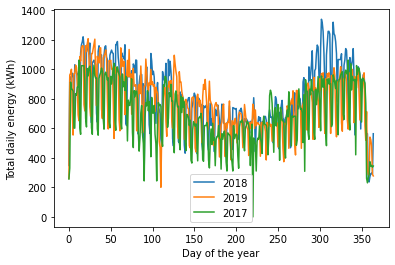

In [7]:
#plot the results

%matplotlib inline

plt.plot(xaxis2018,array2018,label = '2018')
plt.plot(xaxis2019,array2019,label = '2019')
plt.plot(xaxis2017,array2017,label = '2017')
#plt.plot(xaxis2020,array2020,label = '2020')
plt.xlabel('Day of the year')
plt.ylabel('Total daily energy (kWh)')
plt.legend()

In [8]:
#Now calculate the 9 day average to smooth off this interesting but messy graph.
for i in range(4,x2017-4):
    array2017[i] = (1/9)*(array2017[i-4]+array2017[i+4]+array2017[i-3]+array2017[i-2]+array2017[i-1]+array2017[i]+array2017[i+1]+array2017[i+2]+array2017[i+3])

#have 1st 4 and last 4 data points fpr each year equal to the first recorded 7 day average 
    
for j in range(0,3):
    array2017[j] = array2017[4]
for j in range(x2017-3,x2017):
    array2017[j] = array2017[x2017-4]
    
for i in range(4,x2018-4):
    array2018[i] = (1/9)*(array2018[i-4]+array2018[i+4]+array2018[i-3]+array2018[i-2]+array2018[i-1]+array2018[i]+array2018[i+1]+array2018[i+2]+array2018[i+3])
for j in range(0,3):
    array2018[j] = array2018[4]
for j in range(x2018-3,x2018):
    array2018[j] = array2018[x2018-4]
    
#for i in range(3,x2019-3):
#    array2019[i] = (1/7)*(array2019[i-3]+array2019[i-2]+array2019[i-1]+array2019[i]+array2019[i+1]+array2019[i+2]+array2019[i+3])
#for j in range(0,2):
#    array2019[j] = array2019[3]
#for j in range(x2019-2,x2019):
#    array2019[j] = array2019[x2019-3]

for i in range(4,x2019-4):
    array2019[i] = (1/9)*(array2019[i-4] + array2019[i+4] + array2019[i-3]+array2019[i-2]+array2019[i-1]+array2019[i]+array2019[i+1]+array2019[i+2]+array2019[i+3])
for j in range(0,3):
    array2019[j] = array2019[4]
for j in range(x2019-3,x2019):
    array2019[j] = array2019[x2019-4]
    
for i in range(4,x2020-4):
    array2020[i] = (1/9)*(array2020[i-4]+array2020[i+4]+array2020[i-3]+array2020[i-2]+array2020[i-1]+array2020[i]+array2020[i+1]+array2020[i+2]+array2020[i+3])
for j in range(0,3):
    array2020[j] = array2020[4]
for j in range(x2020-3,x2020):
    array2020[j] = array2020[x2020-4]

In [9]:
#create an array of the daily usage for 2019 to compare against the smoothed version we just calculated

dayarray2019 = np.zeros(len(df_2019))
for i,j in enumerate(df_2019_dt,0):
    dayarray2019[i] = j

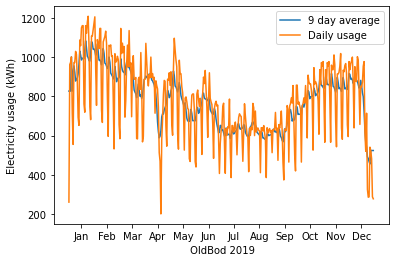

In [10]:
#plot the results

%matplotlib inline
plt.plot(xaxis2019,array2019,label = '9 day average')
plt.plot(xaxis2019,dayarray2019,label = 'Daily usage')


#tidy the graph
plt.xticks(np.linspace(15,380,13)[:-1], ('Jan', 'Feb' ,'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov', 'Dec'))
plt.xlabel(' OldBod 2019')
plt.ylabel('Electricity usage (kWh)')
plt.legend()

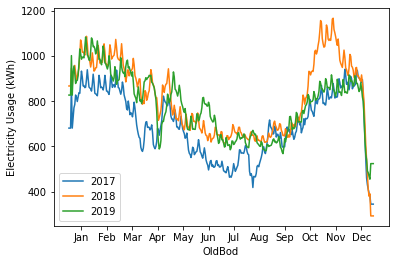

In [11]:
#plot a graph that shows the smoothed electricity for 2017m, 2018 and 2019

%matplotlib inline

plt.plot(xaxis2017,array2017,label = '2017')
plt.plot(xaxis2018,array2018,label = '2018')
plt.plot(xaxis2019,array2019,label = '2019')

#if we want to include 2020 in this, can do so by uncommenting the next line
#plt.plot(xaxis2020,array2020,label = '2020')

#tidy the graph
plt.xticks(np.linspace(15,380,13)[:-1], ('Jan', 'Feb' ,'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct', 'Nov', 'Dec'))
plt.xlabel('OldBod')
plt.ylabel('Electricity Usage (kWh)')
plt.legend()

In [12]:
#extracting May2019 from the 2019 array

May2019 = df[902:932]
May2019 = May2019['Daily Sum']
xmay = list(range(0,30))


Text(0, 0.5, 'Electricity Usage (kWh)')

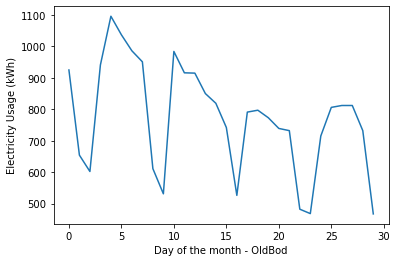

In [13]:
#plotting each day in May 2019

%matplotlib inline

plt.plot(xmay,May2019,label = 'Daily')
#plt.plot(xmay,May2019Average,label = 'Rolling average') to plot the rolling average


#tidy the graph
plt.xlabel('Day of the month - OldBod')
plt.ylabel('Electricity Usage (kWh)')
#plt.savefig('OldBod_Month.png')
#plt.legend()